# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 2 - Linear Regression / Logistic Regression </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://mlfbg.github.io/MachineLearningInFinance/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1O78bRAVgzkh2vz4w4ZqYGV2kqmFXW4-J?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

Outline 

- [Linear Regression](#Linear-Regression)
  - [Create Fake Data](#Create-Fake-Data)
  - [Solve the Linear Regression problem using Normal equation](#Solve-the-Linear-Regression-problem-using-Normal-equation)
  - [Solve the Linear Regression problem using Gradient Descent in numpy](#Solve-the-Linear-Regression-problem-using-Gradient-Descent-in-numpy)
- [Logistic Regression](#Logistic-Regression)
  - [Load the Iris Dataset](#Load-the-Iris-Dataset)
  - [Gradient Descent in numpy](#Gradient-Descent-in-numpy)
- [Summary](#Summary)

# Linear Regression


In [ ]:
# Import Modules
import numpy as np # to manipulate arrays
import matplotlib.pyplot as plt # to plot data
plt.style.use('dark_background') # to adapt the colors to a dark background

## Create Fake Data

Q1. Let's create a fake dataset. We try to predict the salary of an employee based on the number of years of experience.

In [ ]:
N = 100 # number of samples
D = 1 # dimensionality of data 

np.random.seed(0) # fix the seed to generate the same samples eveytime we run the cell
X = np.random.randn(N, D)*4 + 20 # Generate fake data
true_W = 0.5 # first parameter
true_b = 0.7 # second parameter

Y = X.dot(true_W)+ true_b + np.random.randn(N, 1) # Fake labels

Q2. Plot the fake data

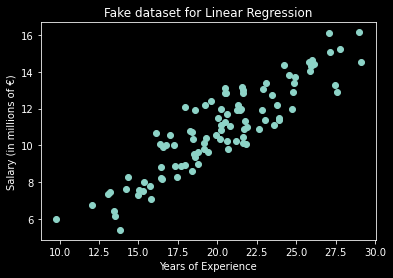

In [ ]:
# scatter plot
plt.scatter(X, Y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary (in millions of €)")
plt.title("Fake dataset for Linear Regression")
plt.show()


Q3. Show the best line used to create the fake data

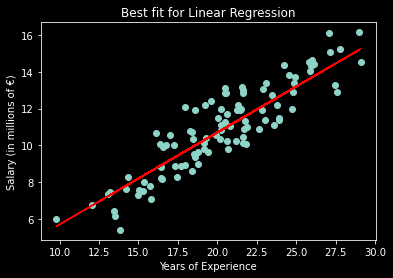

In [ ]:
# Predicted target: Y_hat = X true_W + true_b
Y_hat = X.dot(true_W) + true_b
# scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_hat, c="red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (in millions of €)")
plt.title("Best fit for Linear Regression")
plt.show()

Q4. Let's perform the change of variable:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=11uenRL0GgXIl_4-0Bzi0jcyG_8PVl9Ug"></center>

In [ ]:
np.repeat(1, N)[:, None]

In [ ]:
X.shape

(100, 1)

In [ ]:
X_hat = np.concatenate((X, np.repeat(1, N)[:, None]), axis = 1)

In [ ]:
X_hat.shape

(100, 2)

## Solve the Linear Regression problem using Normal equation

Loss and Gradient expressions:

<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1t9zKI1ohGwJTzA4ir4De2ypMVO2vdmLQ"></center>

* By setting the gradient to zero. We obtain the following equation, called the **Normal Equation**:
\begin{equation}
\hat{X}^T \hat{X} \hat{w} =  \hat{X}^T Y
\end{equation}

* If $\hat{X}^T \hat{X}$ is invertible, the optimal $\hat{w}^*$  is given by the following equation:

\begin{equation}
\hat{w}^* = (\hat{X}^T \hat{X})^{-1} \hat{X}^T Y
\end{equation}

Q5. Calculate $\hat{w}^*$ 

In [ ]:
w_normal = (np.linalg.inv((X_hat.T.dot(X_hat))).dot(X_hat.T)).dot(Y)

In [ ]:
w_normal

array([[0.52867461],
       [0.20166092]])

Q6. Show the fitted line after solving the normal equation

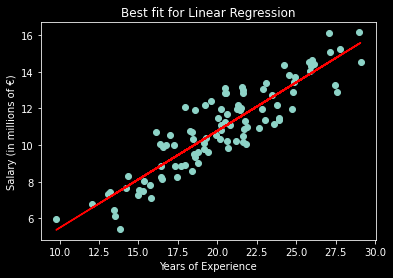

In [ ]:
# Predicted target:
Y_hat = X.dot(w_normal[0]) + w_normal[1]
plt.scatter(X, Y)
plt.plot(X, Y_hat, c="red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (in millions of €)")
plt.title("Best fit for Linear Regression")
plt.show()

## Solve the Linear Regression problem using Gradient Descent in numpy

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=10YjrbBSmNh910jcnkKiUVccPVQCKFbPU"></center>

Q7. Perform the optimization using gradient descent

In [ ]:
max_iter = 20 # number of iterations for gradient descent
eta = 0.001 # learning rate 

losses = []

# Gradient Descent Algorithm
W_hat = np.random.random((D+1, 1))
for i in range(max_iter):
    P = X_hat.dot(W_hat) # P = XW + b = X_hat W_hat
    loss = (1/N)*((Y - P).T).dot(Y - P) # loss = (1/N) || Y - P ||^2 (||z||^2 = z^T z)
    # gradient w.r.t W_hat : (2/N) (X_hat^T X_hat W_hat - X_hat^T Y)
    grad_W_hat = (2/N)*(X_hat.T.dot(X_hat.dot(W_hat)) - X_hat.T.dot(Y))
    
    # Gradient descent update:
    W_hat -= eta*grad_W_hat # W <- W - eta*grad_W (W = w - equivalent w -= ..)
    
    # append losses
    losses.append(float(loss))

Q8. Plot the losses

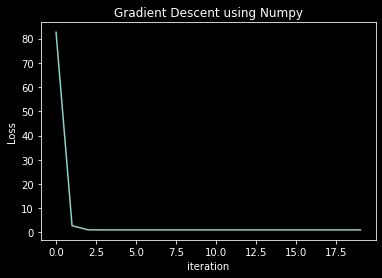

In [ ]:
# plot losses  
plt.plot(losses)
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.title("Gradient Descent using Numpy")
plt.show()

Q9. Show the fitted line after the gradient descent algorithm

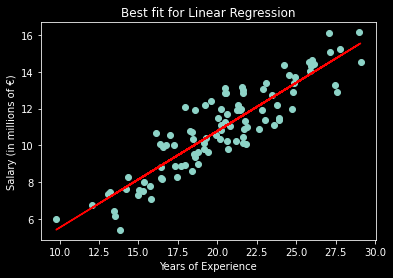

In [ ]:
# Predicted target:
Y_hat = X.dot(W_hat[0]) + W_hat[1]
plt.scatter(X, Y)
plt.plot(X, Y_hat, c="red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (in millions of €)")
plt.title("Best fit for Linear Regression")
plt.show()

# Logistic Regression 

In [ ]:
# Import Modules
from sklearn import datasets # import iris dataset from sklearn
from scipy.special import expit # for the sigmoid (called expit) function

## Load Iris Dataset

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=19RdLMhodreCvIOGELgcVcPrxl2AYSnKx"></center>

Q10. Load the Iris dataset 

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
Y = iris.target

# keep only the rows for which Y in {0, 1}
X = X[Y != 2]
Y = Y[Y != 2]

Q11. Plot data

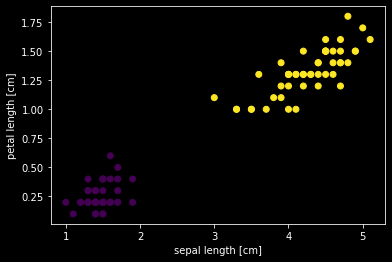

In [ ]:
# plot Data
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()


Q12. Print the shape of data


In [ ]:
# Shape of data
N, D = X.shape

## Gradient Descent in numpy

Loss and Gradient expressions:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1BLIo0z8ZPG0lxBh6qVgo2LSIlLhdEdq6"></center>

Useful Matrices to compute the gradient:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1CD8-Ob1MnCjKFd-Kr5-9l7cWa1Wf2w06"></center>

* To compute the gradient of $J$ with respect to $w$, we can use the columns $R_1, \dots, R_N$ of the final matrix $\hat{\epsilon} X$.
* The gradient can then be expressed as follows: 
\begin{equation}
\nabla_w J(w) = \frac{1}{N} \sum_{i=1}^N R_i
\end{equation}
* We can then apply the Gradient Descent Algorithm

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=104lZd77kIuSfDbH4o3tM50cRmwmqN_B4"></center>

Q13. Define the hyperparameters of the Gradient Descent Algorithm

In [ ]:
max_iter = 1000 # number of iterations of gradient descent
eta = 0.001 # learning rate for gradient descent 

Q14. Gradient Descent Algorithm

In [ ]:
losses = []

W = np.random.randn(D)
for i in range(max_iter):
    P = expit(X.dot(W)) # P =sigmoid(XW)
    # Loss = -(1/N) (sum_i y_i log(sigmoid(w^T x_i)) 
    #         + (1-y_i) log(sigmoid(- w^T x_i))))
    loss = - (1/N)*np.sum((Y * np.log(P)) + ((1 - Y)*np.log(expit(-X.dot(W))))) 
    epsilon = P - Y
    epsilon_hat = np.diag((epsilon))
    grad_W = (1/N)* np.sum((epsilon_hat).dot(X), axis = 0) # gradient w.r.t W
    
    # Gradient descent update:
    W -= eta*grad_W # W <- W - eta*grad_W
    
    # append losses
    losses.append(float(loss))

Q15. Plot the losses

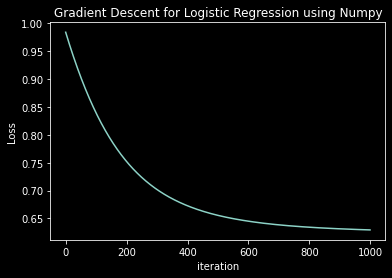

In [ ]:
plt.plot(losses)
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.title("Gradient Descent for Logistic Regression using Numpy")
plt.show()

# Summary

In this lecture you learned how to learn the parameters of a model by applying the gradient descent algorithm.


*   Learning the parameters of the Linear Regression Model
*   Learning the parameters of the Logistic Regression Model

